In [116]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [117]:
data = pd.read_csv("bank.csv")

le = LabelEncoder()
data["pep"] = le.fit_transform(data["pep"])
data["sex"] = le.fit_transform(data["sex"])
data["region"] = le.fit_transform(data["region"])
data["married"] = le.fit_transform(data["married"])
data["car"] = le.fit_transform(data["car"])
data["save_act"] = le.fit_transform(data["save_act"])
data["current_act"] = le.fit_transform(data["current_act"])
data["mortgage"] = le.fit_transform(data["mortgage"])
data = data.dropna()
x = data.drop(["id","pep"],axis=1)
y = data["pep"]


In [118]:
knn = KNeighborsClassifier()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=4)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

print(accuracy_score(y_test, y_pred))

0.5444444444444444


0.6


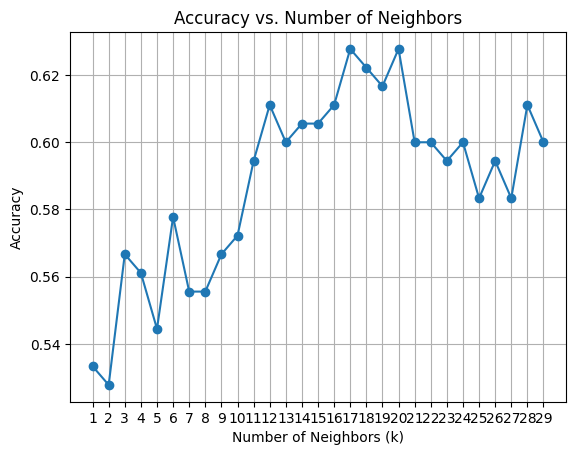

In [119]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(x_train, y_train)

k_values = range(1, 30)  # Range of k values
accuracies = []  # List to store accuracies

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

print(accuracy)
# Plotting the accuracies
plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy vs. Number of Neighbors')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [120]:
train_score = {}
test_score = {}
n_neighbors = np.arange(2, 30, 1)
for neighbor in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(x_train, y_train)
    train_score[neighbor]=knn.score(x_train, y_train)
    test_score[neighbor]=knn.score(x_test, y_test)

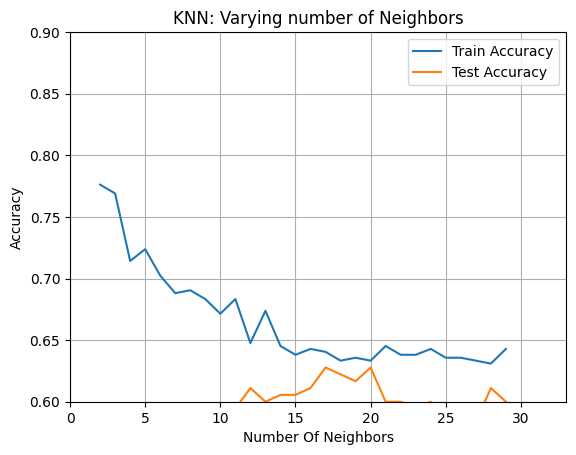

In [121]:
plt.plot(n_neighbors, train_score.values(), label="Train Accuracy")
plt.plot(n_neighbors, test_score.values(), label="Test Accuracy")
plt.xlabel("Number Of Neighbors")
plt.ylabel("Accuracy")
plt.title("KNN: Varying number of Neighbors")
plt.legend()
plt.xlim(0, 33)
plt.ylim(0.60, 0.90)
plt.grid()
plt.show()

In [122]:
for key, value in test_score.items():
    if value==max(test_score.values()):
        print(key)

17
20


In [123]:
kf=KFold(n_splits=5,shuffle=True,random_state=42)
parameter={'n_neighbors': np.arange(2, 30, 1)}
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn, param_grid=parameter, cv=kf, verbose=1)
knn_cv.fit(x_train, y_train)
print(knn_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'n_neighbors': 24}


In [124]:
knn=KNeighborsClassifier(n_neighbors=24)
knn.fit(x_train, y_train)
y_pred=knn.predict(x_test)
accuracy=accuracy_score(y_test, y_pred)
print(accuracy)

0.6


In [125]:
k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
x = scaler.fit_transform(x)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, x, y, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

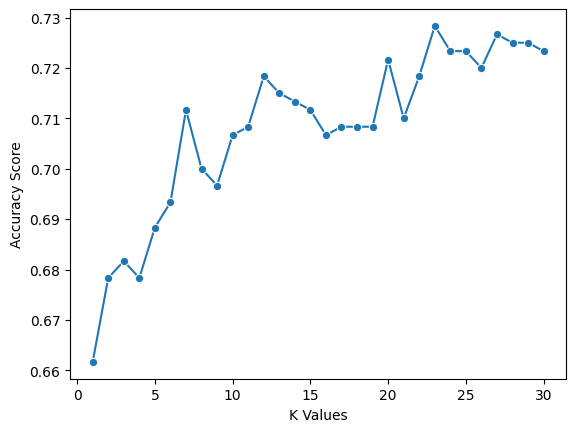

In [126]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [127]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=23)

In [128]:
y_pred = knn.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.5944444444444444
Precision: 0.5833333333333334
Recall: 0.49411764705882355
